<a href="https://colab.research.google.com/github/MariaRegina/GML/blob/master/Trabalho_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_excel ('Geral.xlsx')

In [3]:
data


,Data,Recuperados,Confirmados,Mortos
0,1,0,0,0
1,2,0,2,0
2,3,127,5717,201
3,4,25318,45757,2906


In [0]:
data.Confirmados.plot()


In [0]:
data.Mortos.plot()


In [0]:

data.Recuperados.plot()


In [7]:
x=data.Data
y=data.Confirmados
y=y.array
x=x.array
x

<PandasArray>
[1, 2, 3, 4]
Length: 4, dtype: int64

In [9]:
y

<PandasArray>
[0, 2, 5717, 45757]
Length: 4, dtype: int64

In [0]:
import numpy as np
def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Create a square matrix to hold pyramid
    pyramid[::,0] = y # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # return first row

coeff_vector = getNDDCoeffs(x, y)
coeff_vector

In [0]:
final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
n = coeff_vector.shape[0] # get number of coeffs
for i in range(n):
    p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
    for j in range(i):
        # each vector has degree of i
        # their terms are dependant on 'x' values
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
        p = np.polymul(p, p_temp) # multiply dummy with expression
    p *= coeff_vector[i] # apply coefficient
    final_pol = np.polyadd(final_pol, p) # add to target polynomial

p = np.flip(final_pol[0].coef, axis=0)


In [0]:
teste1=p

In [15]:
x=data.Data
y=data.Mortos
y=y.array
x=x.array
x

<PandasArray>
[1, 2, 3, 4]
Length: 4, dtype: int64

In [16]:
y

<PandasArray>
[0, 0, 201, 2906]
Length: 4, dtype: int64

In [17]:
import numpy as np
def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Create a square matrix to hold pyramid
    pyramid[::,0] = y # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # return first row

coeff_vector = getNDDCoeffs(x, y)
coeff_vector

array([  0.        ,   0.        , 100.5       , 383.83333333])

In [0]:
final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
n = coeff_vector.shape[0] # get number of coeffs
for i in range(n):
    p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
    for j in range(i):
        # each vector has degree of i
        # their terms are dependant on 'x' values
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
        p = np.polymul(p, p_temp) # multiply dummy with expression
    p *= coeff_vector[i] # apply coefficient
    final_pol = np.polyadd(final_pol, p) # add to target polynomial

p = np.flip(final_pol[0].coef, axis=0)

In [19]:
teste2=p
teste2

array([  383.83333333, -2202.5       ,  3920.66666667, -2102.        ])

In [20]:
x=data.Data
y=data.Recuperados
y=y.array
x=x.array
x

<PandasArray>
[1, 2, 3, 4]
Length: 4, dtype: int64

In [21]:
y


<PandasArray>
[0, 0, 127, 25318]
Length: 4, dtype: int64

In [22]:
import numpy as np
def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Create a square matrix to hold pyramid
    pyramid[::,0] = y # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # return first row

coeff_vector = getNDDCoeffs(x, y)
coeff_vector

array([   0.        ,    0.        ,   63.5       , 4156.16666667])

In [0]:
final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
n = coeff_vector.shape[0] # get number of coeffs
for i in range(n):
    p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
    for j in range(i):
        # each vector has degree of i
        # their terms are dependant on 'x' values
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
        p = np.polymul(p, p_temp) # multiply dummy with expression
    p *= coeff_vector[i] # apply coefficient
    final_pol = np.polyadd(final_pol, p) # add to target polynomial

p = np.flip(final_pol[0].coef, axis=0)

In [24]:
teste3=p
teste3

array([  4156.16666667, -24873.5       ,  45527.33333333, -24810.        ])

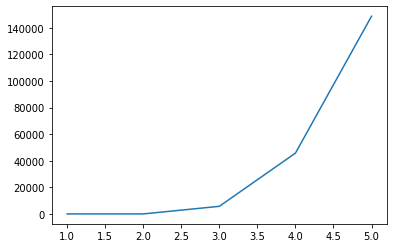

In [25]:
import matplotlib.pyplot as plt
x_axis2 = np.linspace(1, 5,num=5,dtype=int)
y_axis2 = np.polyval(teste1, x_axis2)
plt.plot(x_axis2, y_axis2)
plt.show()

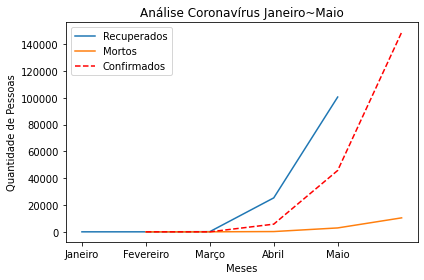

In [26]:
import matplotlib.pyplot as plt

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']

x_axis = np.linspace(1, 5,num=5,dtype=int)
y_axis = np.polyval(teste3, x_axis)
plt.plot(meses, y_axis, label="Recuperados")

x_axis1 = np.linspace(1, 5,num=5,dtype=int)
y_axis1 = np.polyval(teste2, x_axis1)
plt.plot(x_axis1, y_axis1, label="Mortos")

x_axis2 = np.linspace(1, 5,num=5,dtype=int)
y_axis2 = np.polyval(teste1, x_axis2)
plt.plot(x_axis2, y_axis2,'r--', label="Confirmados")

plt.matplotlib.pyplot.title('Análise Coronavírus Janeiro~Maio')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')

plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

plt.show()